In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc

In [2]:
df_data15 = pd.read_csv('Cleaned_startup data [data15].csv')
df_data15.head()

,state_code,latitude,longitude,zip_code,city,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,42.358880,-71.056820,92101,San Diego,Bandsintown,1,1/1/2007,Still Operating,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,CA,37.238916,-121.973718,95032,Los Gatos,TriCipher,1,1/1/2000,Still Operating,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,CA,32.901049,-117.192656,92121,San Diego,Plixi,1,3/18/2009,Still Operating,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,CA,37.320309,-122.050040,95014,Cupertino,Solidcore Systems,1,1/1/2002,Still Operating,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,CA,37.779281,-122.419236,94105,San Francisco,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [ ]:
df_data15.describe()

,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,9.230000e+02,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.00000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,38.517442,-103.539212,0.646804,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,2.541975e+07,1.841820,0.527627,0.114843,0.089924,0.045504,0.221018,0.165764,0.156013,0.08559,0.079090,0.067172,0.056338,0.027086,0.036836,0.003250,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317
std,3.741497,22.394167,0.478222,2.510449,2.967910,2.720615,2.935418,7.265776,1.390922,1.896344e+08,1.322632,0.499507,0.319005,0.286228,0.208519,0.415158,0.372070,0.363064,0.27991,0.270025,0.250456,0.230698,0.162421,0.188462,0.056949,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052
min,25.752358,-122.756956,0.000000,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,1.100000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,37.388869,-122.198732,0.000000,0.576700,1.669850,1.252100,2.930150,3.000000,1.000000,2.725000e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,37.779281,-118.374037,1.000000,1.446600,3.528800,3.055353,4.754423,5.000000,2.000000,1.000000e+07,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,40.730646,-77.214731,1.000000,3.575350,5.560250,4.002700,6.039750,10.000000,3.000000,2.472500e+07,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000
max,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,5.700000e+09,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


In [ ]:
df_data15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   state_code                923 non-null    object 
 1   latitude                  923 non-null    float64
 2   longitude                 923 non-null    float64
 3   zip_code                  923 non-null    object 
 4   city                      923 non-null    object 
 5   name                      923 non-null    object 
 6   labels                    923 non-null    int64  
 7   founded_at                923 non-null    object 
 8   closed_at                 923 non-null    object 
 9   first_funding_at          923 non-null    object 
 10  last_funding_at           923 non-null    object 
 11  age_first_funding_year    923 non-null    float64
 12  age_last_funding_year     923 non-null    float64
 13  age_first_milestone_year  923 non-null    float64
 14  age_last_m

In [5]:
#removing unneccesury features
df_new = df_data15.drop(['latitude','longitude','labels','zip_code'],axis=1)

In [6]:
df_new['status'].unique()
df_new['success'] = df_new['status'].replace({'acquired':1,'closed':0})

In [7]:
for i in range(0,923):
  if(df_new.at[i,'is_top500']==1):
    df_new.at[i,'success'] = 1

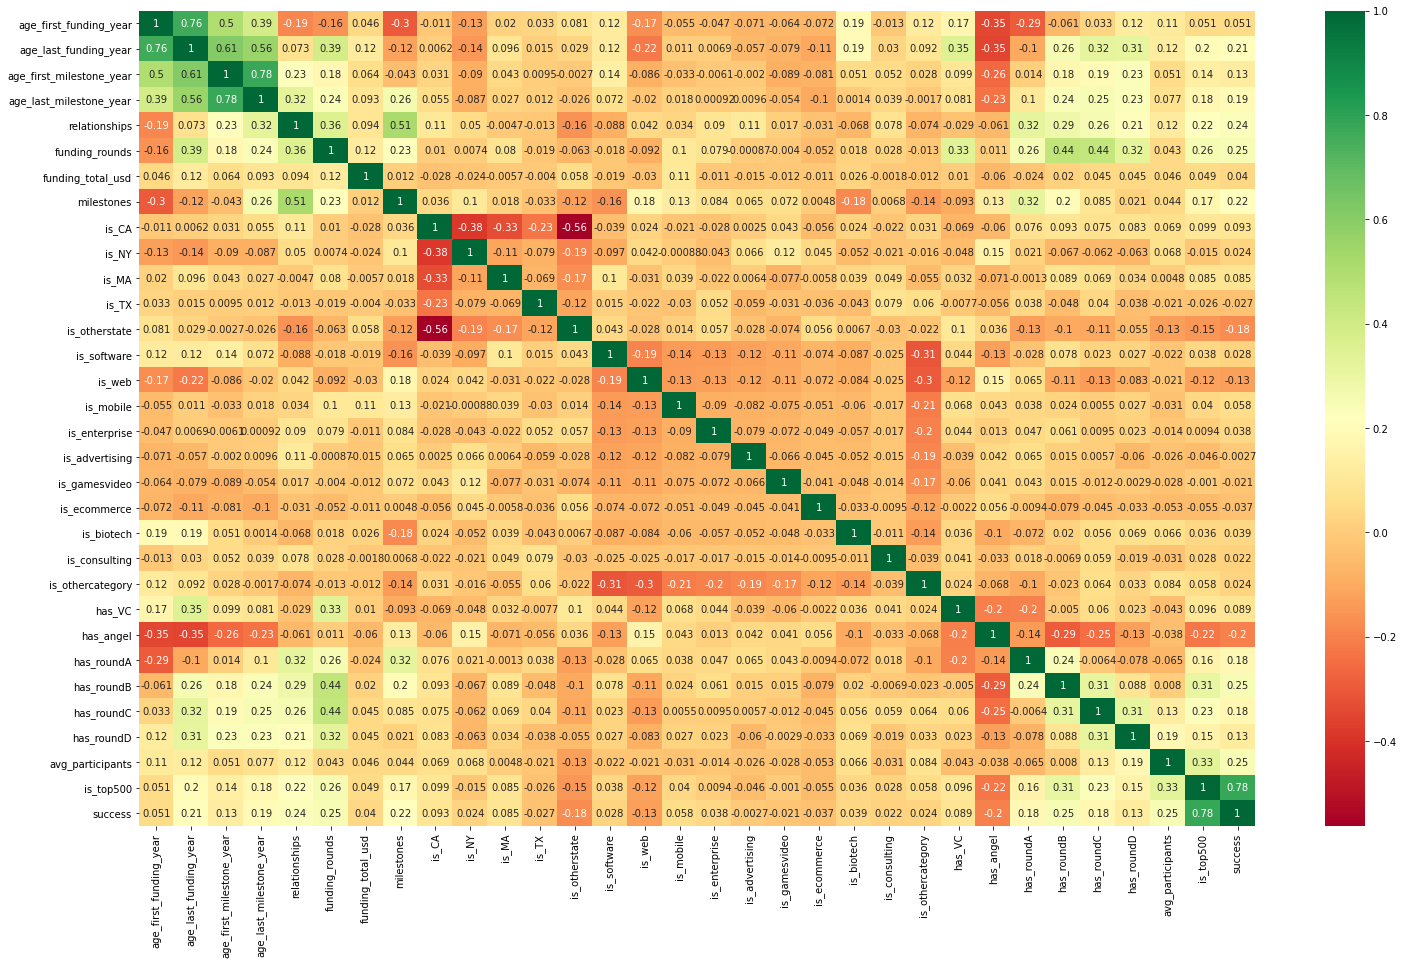

In [ ]:
plt.figure(figsize=(25,15))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df_new.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

In [ ]:
df_new['state_code'].value_counts()

CA    488
NY    106
MA     83
WA     42
TX     42
CO     19
IL     18
PA     17
VA     13
GA     11
OR      7
MD      7
NC      7
NJ      7
FL      6
OH      6
MN      5
CT      4
DC      4
RI      3
UT      3
MI      3
TN      3
IN      2
NH      2
NV      2
AZ      2
MO      2
ME      2
KY      2
WV      1
AR      1
ID      1
NM      1
WI      1
Name: state_code, dtype: int64

In [ ]:
df_new['is_othercategory'].value_counts()

0    625
1    298
Name: is_othercategory, dtype: int64

first_milestone,last_milestone

first_funding_year,last_funding_year-->should make a feature named period between funding.

relationship,milestone

is_top500, has_angel

relationship, success

is_otherstate, success



Here is the **chi-squre** testing

In [6]:
from scipy import stats

contingency_table=pd.crosstab(df_new["is_top500"],df_new["has_angel"])
print('contingency_table :-\n',contingency_table)

#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)
b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]

print("Expected Values :-\n",Expected_Values)
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)

alpha = 0.05

from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]

critical_value=chi2.ppf(q=1-alpha,df=ddof)

#p-value

p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)

print('Significance level: ',alpha)
print("\n")

print('Degree of Freedom: ',ddof)
print("\n")

print('chi-square statistic:',chi_square_statistic)
print("\n")

print('critical_value:',critical_value)
print("\n")

print('p-value:',p_value)
print("\n")

if chi_square_statistic>=critical_value:
    print("Accept H1,There is a relationship between 2 variables")
else:
    print("Retain H0,There is no relationship between 2 variables")
    
if p_value<=alpha:
    print("Accept H1,There is a relationship between 2 variables")
else:
    print("Retain H0,There is no relationship between 2 variables")

contingency_table :-
 has_angel    0    1
is_top500          
0           96   80
1          592  155
Observed Values :-
 [[ 96  80]
 [592 155]]
Expected Values :-
 [[131.18959913  44.81040087]
 [556.81040087 190.18959913]]
Significance level:  0.05


Degree of Freedom:  1


chi-square statistic: 45.808299697523104


critical_value: 3.841458820694124


p-value: 1.3041012714154476e-11


Accept H1,There is a relationship between 2 variables
Accept H1,There is a relationship between 2 variables


In [7]:
from scipy import stats

contingency_table=pd.crosstab(df_new["relationships"],df_new["success"])
print('contingency_table :-\n',contingency_table)

#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)
b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]

print("Expected Values :-\n",Expected_Values)
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)

alpha = 0.05

from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]

critical_value=chi2.ppf(q=1-alpha,df=ddof)

#p-value

p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)

print('Significance level: ',alpha)
print("\n")

print('Degree of Freedom: ',ddof)
print("\n")

print('chi-square statistic:',chi_square_statistic)
print("\n")

print('critical_value:',critical_value)
print("\n")

print('p-value:',p_value)
print("\n")

if chi_square_statistic>=critical_value:
    print("Accept H1,There is a relationship between 2 variables")
else:
    print("Retain H0,There is no relationship between 2 variables")
    
if p_value<=alpha:
    print("Accept H1,There is a relationship between 2 variables")
else:
    print("Retain H0,There is no relationship between 2 variables")

contingency_table :-
 success         0   1
relationships        
0              34   3
1              47  16
2              57  22
3              49  51
4              30  60
5              29  69
6              19  52
7              13  32
8              13  28
9               6  37
10              7  34
11              3  19
12              4  23
13              4  22
14              2  13
15              2  17
16              3  15
17              0   9
18              0  10
19              0   8
20              0   1
21              0  10
22              1   4
23              0   5
24              0   4
25              0   5
26              0   3
27              1   4
28              0   3
29              0   2
30              0   4
31              0   1
32              1   0
33              1   0
35              0   3
37              0   3
38              0   1
42              0   1
45              0   1
57              0   1
63              0   1
Observed Values :-
 [[34  3]
 [4

In [8]:
from scipy import stats

contingency_table=pd.crosstab(df_new["is_otherstate"],df_new["success"])
print('contingency_table :-\n',contingency_table)

#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)
b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]

print("Expected Values :-\n",Expected_Values)
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)

alpha = 0.05

from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]

critical_value=chi2.ppf(q=1-alpha,df=ddof)

#p-value

p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)

print('Significance level: ',alpha)
print("\n")

print('Degree of Freedom: ',ddof)
print("\n")

print('chi-square statistic:',chi_square_statistic)
print("\n")

print('critical_value:',critical_value)
print("\n")

print('p-value:',p_value)
print("\n")

if chi_square_statistic>=critical_value:
    print("Accept H1,There is a relationship between 2 variables")
else:
    print("Retain H0,There is no relationship between 2 variables")
    
if p_value<=alpha:
    print("Accept H1,There is a relationship between 2 variables")
else:
    print("Retain H0,There is no relationship between 2 variables")

contingency_table :-
 success          0    1
is_otherstate          
0              223  496
1              103  101
Observed Values :-
 [[223 496]
 [103 101]]
Expected Values :-
 [[253.94799567 465.05200433]
 [ 72.05200433 131.94799567]]
Significance level:  0.05


Degree of Freedom:  1


chi-square statistic: 26.38269573070739


critical_value: 3.841458820694124


p-value: 2.800380982659334e-07


Accept H1,There is a relationship between 2 variables
Accept H1,There is a relationship between 2 variables


In [9]:
from scipy import stats

contingency_table=pd.crosstab(df_new["first_funding_at"],df_new["last_funding_at"])
print('contingency_table :-\n',contingency_table)

#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)
b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]

print("Expected Values :-\n",Expected_Values)
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)

alpha = 0.05

from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]

critical_value=chi2.ppf(q=1-alpha,df=ddof)

#p-value

p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)

print('Significance level: ',alpha)
print("\n")

print('Degree of Freedom: ',ddof)
print("\n")

print('chi-square statistic:',chi_square_statistic)
print("\n")

print('critical_value:',critical_value)
print("\n")

print('p-value:',p_value)
print("\n")

if chi_square_statistic>=critical_value:
    print("Accept H1,There is a relationship between 2 variables")
else:
    print("Retain H0,There is no relationship between 2 variables")
    
if p_value<=alpha:
    print("Accept H1,There is a relationship between 2 variables")
else:
    print("Retain H0,There is no relationship between 2 variables")

contingency_table :-
 last_funding_at   1/1/2001  1/1/2004  1/1/2005  ...  9/8/2008  9/9/2008  9/9/2011
first_funding_at                                ...                              
1/1/2000                 0         0         0  ...         0         0         0
1/1/2001                 1         0         0  ...         0         0         0
1/1/2002                 0         0         0  ...         0         0         0
1/1/2003                 0         0         0  ...         0         0         0
1/1/2004                 0         1         0  ...         0         0         0
...                    ...       ...       ...  ...       ...       ...       ...
9/7/2011                 0         0         0  ...         0         0         0
9/8/2003                 0         0         0  ...         0         0         0
9/8/2005                 0         0         0  ...         0         0         0
9/9/2005                 0         0         0  ...         0         0     

In [10]:
from scipy import stats

contingency_table=pd.crosstab(df_new["funding_rounds"],df_new["relationships"])
print('contingency_table :-\n',contingency_table)

#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)
b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]

print("Expected Values :-\n",Expected_Values)
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)

alpha = 0.05

from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]

critical_value=chi2.ppf(q=1-alpha,df=ddof)

#p-value

p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)

print('Significance level: ',alpha)
print("\n")

print('Degree of Freedom: ',ddof)
print("\n")

print('chi-square statistic:',chi_square_statistic)
print("\n")

print('critical_value:',critical_value)
print("\n")

print('p-value:',p_value)
print("\n")

if chi_square_statistic>=critical_value:
    print("Accept H1,There is a relationship between 2 variables")
else:
    print("Retain H0,There is no relationship between 2 variables")
    
if p_value<=alpha:
    print("Accept H1,There is a relationship between 2 variables")
else:
    print("Retain H0,There is no relationship between 2 variables")

contingency_table :-
 relationships   0   1   2   3   4   5   6   7   ...  33  35  37  38  42  45  57  63
funding_rounds                                  ...                                
1               24  40  36  47  32  34  28  18  ...   0   0   0   0   0   0   0   0
2                6  13  28  31  28  31  27  13  ...   0   0   1   0   0   0   0   1
3                3   7   8  12  18  24   9   7  ...   1   0   0   0   0   0   0   0
4                3   2   4   6   3   6   4   4  ...   0   2   0   0   1   0   1   0
5                1   1   2   3   4   2   1   2  ...   0   0   1   1   0   0   0   0
6                0   0   1   0   2   0   1   1  ...   0   0   1   0   0   0   0   0
7                0   0   0   1   2   1   0   0  ...   0   1   0   0   0   1   0   0
8                0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   0
10               0   0   0   0   1   0   0   0  ...   0   0   0   0   0   0   0   0

[9 rows x 41 columns]
Observed Values :-
 [[24 40 36 

here we can see there is a good relationship between relationships and funding.

In [11]:
from scipy import stats

contingency_table=pd.crosstab(df_new["funding_rounds"],df_new["success"])
print('contingency_table :-\n',contingency_table)

#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)
b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]

print("Expected Values :-\n",Expected_Values)
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)

alpha = 0.05

from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]

critical_value=chi2.ppf(q=1-alpha,df=ddof)

#p-value

p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)

print('Significance level: ',alpha)
print("\n")

print('Degree of Freedom: ',ddof)
print("\n")

print('chi-square statistic:',chi_square_statistic)
print("\n")

print('critical_value:',critical_value)
print("\n")

print('p-value:',p_value)
print("\n")

if chi_square_statistic>=critical_value:
    print("Accept H1,There is a relationship between 2 variables")
else:
    print("Retain H0,There is no relationship between 2 variables")
    
if p_value<=alpha:
    print("Accept H1,There is a relationship between 2 variables")
else:
    print("Retain H0,There is no relationship between 2 variables")

contingency_table :-
 success           0    1
funding_rounds          
1               159  158
2               101  179
3                32  135
4                17   73
5                 8   32
6                 2   11
7                 6    7
8                 1    1
10                0    1
Observed Values :-
 [[159 158]
 [101 179]
 [ 32 135]
 [ 17  73]
 [  8  32]
 [  2  11]
 [  6   7]
 [  1   1]
 [  0   1]]
Expected Values :-
 [[111.9631636  205.0368364 ]
 [ 98.89490791 181.10509209]
 [ 58.98374865 108.01625135]
 [ 31.78764897  58.21235103]
 [ 14.12784399  25.87215601]
 [  4.5915493    8.4084507 ]
 [  4.5915493    8.4084507 ]
 [  0.7063922    1.2936078 ]
 [  0.3531961    0.6468039 ]]
Significance level:  0.05


Degree of Freedom:  1


chi-square statistic: 68.11498389638291


critical_value: 3.841458820694124


p-value: 1.1102230246251565e-16


Accept H1,There is a relationship between 2 variables
Accept H1,There is a relationship between 2 variables


so, we can see there is good relationship between success and funding rounds.

In [10]:
from scipy import stats

contingency_table=pd.crosstab(df_new["category_code"],df_new["success"])
print('contingency_table :-\n',contingency_table)

#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)
b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]

print("Expected Values :-\n",Expected_Values)
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)

alpha = 0.06

from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]

critical_value=chi2.ppf(q=1-alpha,df=ddof)

#p-value

p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)

print('Significance level: ',alpha)
print("\n")

print('Degree of Freedom: ',ddof)
print("\n")

print('chi-square statistic:',chi_square_statistic)
print("\n")

print('critical_value:',critical_value)
print("\n")

print('p-value:',p_value)
print("\n")

if chi_square_statistic>=critical_value:
    print("Accept H1,There is a relationship between 2 variables")
else:
    print("Retain H0,There is no relationship between 2 variables")
    
if p_value<=alpha:
    print("Accept H1,There is a relationship between 2 variables")
else:
    print("Retain H0,There is no relationship between 2 variables")

contingency_table :-
 success            0    1
category_code            
advertising        8   54
analytics          2   17
automotive         0    2
biotech            2   32
cleantech          3   20
consulting         0    3
ecommerce          5   20
education          0    4
enterprise         6   67
fashion            1    7
finance            0    6
games_video        8   44
hardware           1   26
health             0    3
hospitality        0    1
manufacturing      1    1
medical            0    7
messaging          2    9
mobile             5   74
music              0    6
network_hosting    5   29
news               0    8
other              1   10
photo_video        1    6
public_relations   7   18
real_estate        2    1
search             2   10
security           1   18
semiconductor      3   32
social             2   12
software          16  137
sports             0    1
transportation     0    2
travel             0    8
web               32  112
Observed Values 

there is good relation-ship between category_code and success.